# Criando os nomes

In [539]:
import pandas as pd

In [540]:
nomes_masculinos = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_femininos = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [541]:
frames = [nomes_masculinos, nomes_femininos]


In [542]:
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [543]:
nomes = pd.concat(frames)['nome'].to_frame() # concatena e transforma em frame

In [544]:
nomes.sample(5) #sample pega dados aleatórios

,nome
143,MAIARA
57,DAIANE
198,ISADORA
186,INES
99,DENISE


## Incluindo ID dos alunos

In [545]:
import numpy as np
np.random.seed(123)

In [546]:
total_alunos = len(nomes)
total_alunos

400

In [547]:
nomes['id_aluno'] = np.random.permutation(total_alunos) +1

In [548]:
nomes

,nome,id_aluno
0,JOSE,235
1,JOAO,43
2,ANTONIO,304
3,FRANCISCO,156
4,CARLOS,343
...,...,...
195,ROSANE,231
196,IVONETE,99
197,LUCIANE,323
198,ISADORA,383


In [549]:
dominios = ['@dominiodoemail.com', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [550]:
nomes

,nome,id_aluno,dominio
0,JOSE,235,@dominiodoemail.com
1,JOAO,43,@servicodoemail.com
2,ANTONIO,304,@servicodoemail.com
3,FRANCISCO,156,@servicodoemail.com
4,CARLOS,343,@servicodoemail.com
...,...,...,...
195,ROSANE,231,@dominiodoemail.com
196,IVONETE,99,@servicodoemail.com
197,LUCIANE,323,@dominiodoemail.com
198,ISADORA,383,@servicodoemail.com


In [551]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [552]:
nomes.head(10)

,nome,id_aluno,dominio,email
0,JOSE,235,@dominiodoemail.com,jose@dominiodoemail.com
1,JOAO,43,@servicodoemail.com,joao@servicodoemail.com
2,ANTONIO,304,@servicodoemail.com,antonio@servicodoemail.com
3,FRANCISCO,156,@servicodoemail.com,francisco@servicodoemail.com
4,CARLOS,343,@servicodoemail.com,carlos@servicodoemail.com
5,PAULO,310,@dominiodoemail.com,paulo@dominiodoemail.com
6,PEDRO,55,@dominiodoemail.com,pedro@dominiodoemail.com
7,LUCAS,288,@dominiodoemail.com,lucas@dominiodoemail.com
8,LUIZ,379,@servicodoemail.com,luiz@servicodoemail.com
9,MARCOS,92,@servicodoemail.com,marcos@servicodoemail.com


## Criando Tabela Cursos


In [553]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [554]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [555]:
import html5lib

In [556]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [557]:
type(cursos)

list

In [558]:
cursos = cursos[0]

In [559]:
type(cursos)

pandas.core.frame.DataFrame

In [560]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


## Alterando Index Cursos

In [561]:
curso = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'}, inplace=True)

In [562]:
curso

In [563]:
cursos['id'] = cursos.index + 1

In [564]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [565]:
cursos = cursos.set_index('id')

In [566]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


## Matriculando os alunos nos cursos

In [567]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [568]:
nomes.head(10)

,nome,id_aluno,dominio,email,matriculas
0,JOSE,235,@dominiodoemail.com,jose@dominiodoemail.com,3
1,JOAO,43,@servicodoemail.com,joao@servicodoemail.com,1
2,ANTONIO,304,@servicodoemail.com,antonio@servicodoemail.com,1
3,FRANCISCO,156,@servicodoemail.com,francisco@servicodoemail.com,3
4,CARLOS,343,@servicodoemail.com,carlos@servicodoemail.com,1
5,PAULO,310,@dominiodoemail.com,paulo@dominiodoemail.com,4
6,PEDRO,55,@dominiodoemail.com,pedro@dominiodoemail.com,2
7,LUCAS,288,@dominiodoemail.com,lucas@dominiodoemail.com,1
8,LUIZ,379,@servicodoemail.com,luiz@servicodoemail.com,1
9,MARCOS,92,@servicodoemail.com,marcos@servicodoemail.com,4


In [569]:
nomes.matriculas.describe()

count    400.000000
mean       2.137500
std        1.511392
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [570]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [625]:
import seaborn as sns

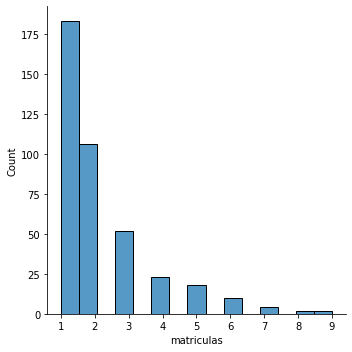

In [626]:
sns.displot(nomes.matriculas)

In [573]:
nomes.matriculas.value_counts()

1    183
2    106
3     52
4     23
5     18
6     10
7      4
8      2
9      2
Name: matriculas, dtype: int64

## Selecionando Cursos

In [574]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
93,ADILSON,372,@servicodoemail.com,adilson@servicodoemail.com,1
198,ISADORA,383,@servicodoemail.com,isadora@servicodoemail.com,3
63,ERICA,239,@servicodoemail.com,erica@servicodoemail.com,2
174,CLEONICE,69,@servicodoemail.com,cleonice@servicodoemail.com,1
69,TEREZA,170,@dominiodoemail.com,tereza@dominiodoemail.com,1


In [575]:
todas_matriculas = []
x = np.random.rand(20)
probabilidade = x / sum(x)

In [576]:
for index, row in nomes.iterrows(): #iterrows corre todas as linhas do dataframe
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = probabilidade)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [577]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,235,8
2,235,10
3,43,19
4,304,16


In [578]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,2,Java para Web
3,76,C# para Web
4,8,Ruby on Rails
5,55,Cursos de Python
6,36,PHP com MySql
7,63,.NET para web
8,63,Novas integrações com Java
9,13,TDD com Java


In [624]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
161,DAMIAO,247,@dominiodoemail.com,damiao@dominiodoemail.com,1
77,ELIAS,324,@servicodoemail.com,elias@servicodoemail.com,2
103,MAICON,145,@dominiodoemail.com,maicon@dominiodoemail.com,5
192,ZILDA,107,@servicodoemail.com,zilda@servicodoemail.com,2
83,EDNA,9,@dominiodoemail.com,edna@dominiodoemail.com,1


In [580]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [581]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,235,8
2,235,10
3,43,19
4,304,16


In [582]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [583]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,2,Java para Web
3,76,C# para Web
4,8,Ruby on Rails
5,55,Cursos de Python


## Saída em diferentes formatos

In [584]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [585]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,49,Lógica de programação
1,2,Java para Web
2,76,C# para Web
3,8,Ruby on Rails
4,55,Cursos de Python
5,36,PHP com MySql
6,63,.NET para web
7,63,Novas integrações com Java
8,13,TDD com Java
9,46,Código limpo com C#


In [586]:
matriculas_json = matriculas_por_curso.to_json()

In [587]:
matriculas_json

'{"quantidade_de_alunos":{"1":49,"2":2,"3":76,"4":8,"5":55,"6":36,"7":63,"8":63,"9":13,"10":46,"11":33,"12":70,"13":42,"14":52,"15":24,"16":45,"17":27,"18":73,"19":76,"20":2},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [588]:
matriculas_html = matriculas_por_curso.to_html()

In [589]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>49</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>76</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>8</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>55</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>36</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>63</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>63</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>13</td>
  

# Criando o banco SQL


In [590]:
!pip install sqlalchemy

In [591]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [592]:
engine = create_engine('sqlite:///:memory:')
engine
type(engine)

sqlalchemy.engine.base.Engine

In [593]:
matriculas_por_curso.to_sql('matriculas', engine)

In [594]:
inspector = inspect(engine) # criando um Inspector object

In [595]:
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando do banco sql

In [596]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [597]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,2,Java para Web
1,4,8,Ruby on Rails
2,9,13,TDD com Java
3,20,2,Orientação objetos com Java


In [598]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,49
1,Java para Web,2
2,C# para Web,76
3,Ruby on Rails,8
4,Cursos de Python,55
5,PHP com MySql,36
6,.NET para web,63
7,Novas integrações com Java,63
8,TDD com Java,13
9,Código limpo com C#,46


In [599]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [600]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [601]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
2,C# para Web,76
17,Programação funcional,73
18,Boas práticas em Java,76


# Escrevendo no banco

In [602]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [603]:
inspector = inspect(engine)
print(inspector.get_table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [604]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,2,Java para Web
3,76,C# para Web
4,8,Ruby on Rails
5,55,Cursos de Python


In [605]:
matriculas

,id_aluno,id_curso
0,235,19
1,235,8
2,235,10
3,43,19
4,304,16
...,...,...
850,323,15
851,383,7
852,383,5
853,383,7


In [606]:
id_curso = 16
proxima_turma = matriculas.query(f"id_curso == {id_curso}")
proxima_turma

,id_aluno,id_curso
4,304,16
49,173,16
66,103,16
95,358,16
103,27,16
104,27,16
120,193,16
141,151,16
142,73,16
144,265,16


In [607]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,JOSE,235,@dominiodoemail.com,jose@dominiodoemail.com,3
1,JOAO,43,@servicodoemail.com,joao@servicodoemail.com,1
2,ANTONIO,304,@servicodoemail.com,antonio@servicodoemail.com,1
3,FRANCISCO,156,@servicodoemail.com,francisco@servicodoemail.com,3
4,CARLOS,343,@servicodoemail.com,carlos@servicodoemail.com,1


In [608]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
4,16,IRENE,@servicodoemail.com,irene@servicodoemail.com,3
6,16,ADAO,@servicodoemail.com,adao@servicodoemail.com,3
13,16,REINALDO,@servicodoemail.com,reinaldo@servicodoemail.com,4
24,16,ANA,@dominiodoemail.com,ana@dominiodoemail.com,5
27,16,VINICIUS,@dominiodoemail.com,vinicius@dominiodoemail.com,3
27,16,VINICIUS,@dominiodoemail.com,vinicius@dominiodoemail.com,3
39,16,WILLIAN,@servicodoemail.com,willian@servicodoemail.com,1
40,16,JOELMA,@servicodoemail.com,joelma@servicodoemail.com,3
71,16,MARGARIDA,@servicodoemail.com,margarida@servicodoemail.com,5


In [609]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
4          IRENE
6           ADAO
13      REINALDO
24           ANA
27      VINICIUS
27      VINICIUS
39       WILLIAN
40        JOELMA
71     MARGARIDA
73       JOAQUIM
81      EDIVALDO
87         TANIA
98          SARA
103      RICARDO
106       ADEMIR
111       ELIANE
115       WILSON
120        ALICE
120        ALICE
126     SEVERINO
136       MARISA
145       MAICON
151    REGINALDO
155        NEUSA
173     FERNANDO
181        LEILA
181        LEILA
193         DAVI
196      ANDREIA
199      EDUARDA
201      OSVALDO
202       ISMAEL
204      DANIELA
257       ELIANA
258        MARTA
261     DOMINGOS
265     BENEDITO
277        ODAIR
304      ANTONIO
321      LARISSA
344      SABRINA
358      LUCIANO
382      ANTONIA
390        ALINE
392        MARLI
Name: nome, dtype: object

In [610]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
4,IRENE
6,ADAO
13,REINALDO
24,ANA
27,VINICIUS
27,VINICIUS
39,WILLIAN
40,JOELMA
71,MARGARIDA


In [611]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [612]:
# Pegando apenas o conteúdo
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [613]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()


In [614]:
proxima_turma = proxima_turma.rename(columns = {'nome': f'Alunos do curso de {nome_curso}'})

In [615]:
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
4,IRENE
6,ADAO
13,REINALDO
24,ANA
27,VINICIUS
27,VINICIUS
39,WILLIAN
40,JOELMA
71,MARGARIDA


# Excel 

In [621]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)


In [622]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,IRENE
1,ADAO
2,REINALDO
3,ANA
4,VINICIUS
5,VINICIUS
6,WILLIAN
7,JOELMA
8,MARGARIDA
9,JOAQUIM
